<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data-and-packages" data-toc-modified-id="Load-data-and-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data and packages</a></span></li><li><span><a href="#Preparing-data-for-K-means-clustering" data-toc-modified-id="Preparing-data-for-K-means-clustering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparing data for K-means clustering</a></span></li><li><span><a href="#Decide-how-many-K-means-clusters-to-use" data-toc-modified-id="Decide-how-many-K-means-clusters-to-use-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Decide how many K-means clusters to use</a></span></li><li><span><a href="#Run-K-means-clustering" data-toc-modified-id="Run-K-means-clustering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Run K-means clustering</a></span></li><li><span><a href="#Visualizing-the-results" data-toc-modified-id="Visualizing-the-results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualizing the results</a></span><ul class="toc-item"><li><span><a href="#In-2D-(only-two-features)" data-toc-modified-id="In-2D-(only-two-features)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>In 2D (only two features)</a></span></li><li><span><a href="#In-3D" data-toc-modified-id="In-3D-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>In 3D</a></span></li></ul></li></ul></div>

# Load data and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

We use a dataset on the sales of different categories of jeans.

In [2]:
df = pd.read_csv("../datasets/Jeans.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 6 columns):
StoreID      689 non-null int64
Fashion      689 non-null int64
Leisure      689 non-null int64
Stretch      689 non-null int64
Original     689 non-null int64
TotalSold    689 non-null int64
dtypes: int64(6)
memory usage: 32.3 KB


Look at the first few rows of the dataframe.

In [4]:
df.head(2)

,StoreID,Fashion,Leisure,Stretch,Original,TotalSold
0,1,182,1528,496,2203,4409
1,2,129,2247,296,1890,4562


**Set StoreID as index, so that the original values can be retrieved from `df` later even if we standardize the fields.**

In [5]:
df.set_index("StoreID");

# Preparing data for K-means clustering

Limit the set to only 3 features for easier demonstration.

In [6]:
df = df.drop(["TotalSold","Original"], axis=1)

In [7]:
df.describe()

,StoreID,Fashion,Leisure,Stretch
count,689.000000,689.000000,689.000000,689.000000
mean,345.000000,92.262700,1916.419448,444.040639
std,199.041453,32.616282,350.839963,211.690142
min,1.000000,1.000000,650.000000,2.000000
25%,173.000000,70.000000,1695.000000,312.000000
50%,345.000000,88.000000,1904.000000,428.000000
75%,517.000000,112.000000,2148.000000,568.000000
max,689.000000,204.000000,2929.000000,1224.000000


The range and scale of each features differ greatly, so we must scale the features appropriately.

We can use the Standard Scale for this purpose.
We observe from the descriptive stats that there might be outliers, so let get them remove. If not much was removed from the set, then no need to worry.  

In [8]:
# Get column names first
names = df.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
df = pd.DataFrame(scaled_df, columns=names)

c:\users\linhd\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\linhd\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


**Note:**

This is more complicated than in R, as `fit_transform()` output an array, and do not retain the column names.

In [9]:
df_clean = df
df_clean.head(4)

,StoreID,Fashion,Leisure,Stretch
0,-1.729539,2.753303,-1.107917,0.245628
1,-1.724511,1.127167,0.942939,-0.699835
2,-1.719483,0.452167,-0.754223,-0.836927
3,-1.714456,0.758985,-0.491805,-0.118375


# Decide how many K-means clusters to use

In [10]:
max_clusters = 30 # Set max clusters arbitrarily at 15.

Calculate the within groups SSE (Cohesion) for different numbers of cluster solutions

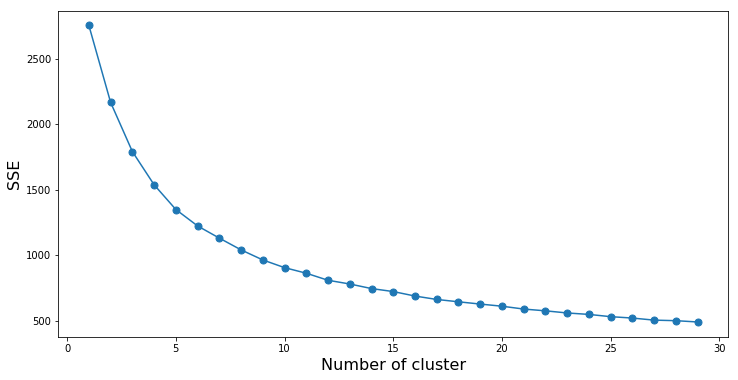

In [11]:
sse = {}
for k in range(1, max_clusters):
    sse[k] = KMeans(n_clusters=k, max_iter=1000).fit(df_clean).inertia_
plt.figure(figsize=(12, 6))
plt.plot(list(sse.keys()), list(sse.values()),marker='.',markersize =14)
plt.xlabel("Number of cluster", fontsize=16)
plt.ylabel("SSE", fontsize=16)
plt.show()

**After looking for the "elbow", I arbitrarily decided that 10 would be a good number of clusters.**

# Run K-means clustering

We set our K-means's `n_cluster` to 10.
The K-means implementation provided by scikit-learn uses Lloyd’s or Elkan’s algorithm.

In [12]:
# The k-means problem - provided by scikit-learn is solved using either Lloyd’s or Elkan’s algorithm.
kmeans = KMeans(n_clusters=10, max_iter=500, n_init=25, random_state=1)
kmeans.fit(df_clean)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=10, n_init=25, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

`predict()` gives us the a label for each row, assigning each observation to a cluster.

In [13]:
# Which row/case is belongs to which cluster
cluster_labels = kmeans.predict(df_clean)

# Visualizing the results

## In 2D (only two features)

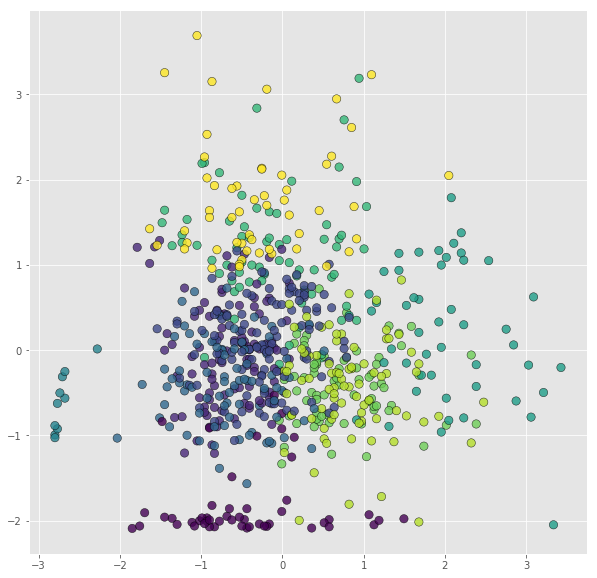

In [14]:
fig = plt.figure(figsize=(10, 10))
plt.style.use('ggplot')
plt.scatter(df_clean['Fashion'], df_clean['Stretch'], c=cluster_labels, alpha=0.8, edgecolor='k', s=70, marker="o", )
plt.show()

## In 3D

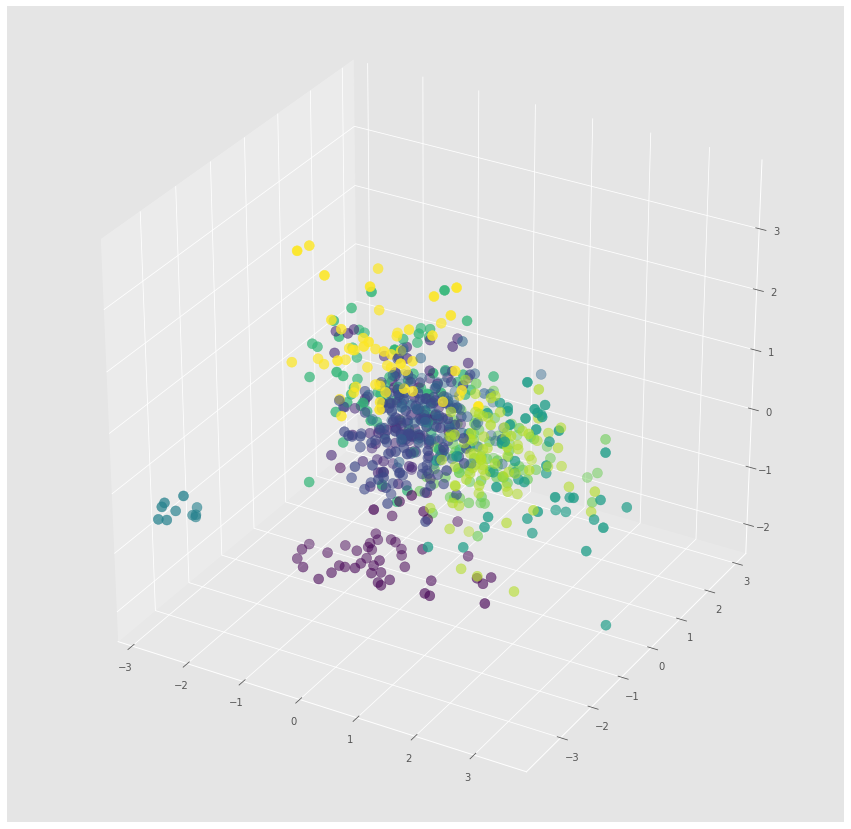

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15)) 
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_clean['Fashion'],df_clean['Leisure'], df_clean['Stretch'] , c=cluster_labels, marker="o", s=100)
plt.savefig('fig1.png', dpi = 300)
plt.show() # DOUBLE CLICK FOR LARGE PIC